# Loan Prediction 


##     - This is a loan approval prediction which is of supervised classification model.

## Objective : The company wants to automate loan eligibility process based on customer information.

<h3> Importing Packages </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Reading Data </h3>

In [2]:
data = pd.read_csv("/home/surya/Downloads/train_ctrUa4K.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<h3>          Mapping Target Variable</h3>


In [7]:
data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [8]:
data["Loan_Status"] = data["Loan_Status"].map({ "Y":1 , "N":0 })

In [9]:
data.dtypes["Loan_Status"]

dtype('int64')

<h3> EXPLORATORY DATA ANALYSIS (EDA) </h3>

<h3> Plotting Of Numerical Distributions Using Histogram</h3>


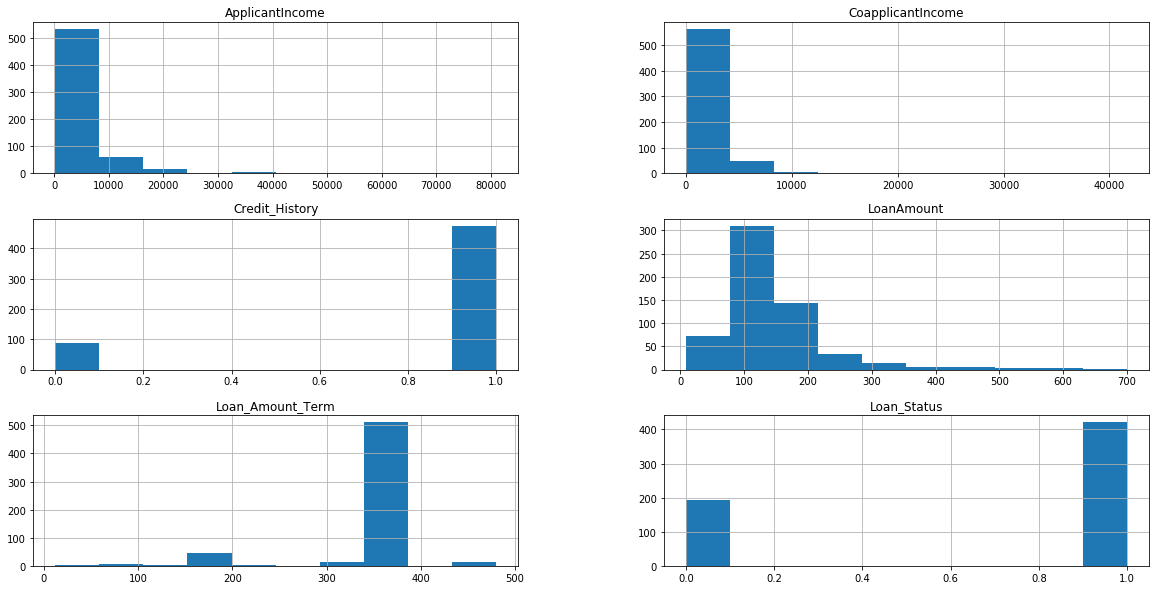

In [10]:
data.hist(figsize=(20,10))
plt.show()


<h4> Based on above graph, we can understand that : <p>
    
(1)  Applicant income and co applicant income are skewed<p>
    
(2)  If credit history = 1, then, there is a better chance to get a loan
</h4>   
 

<h3> Plotting of Categorical Values</h3>

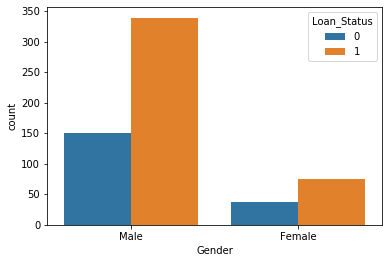

In [11]:
sns.countplot(x="Gender",hue="Loan_Status",data=data)


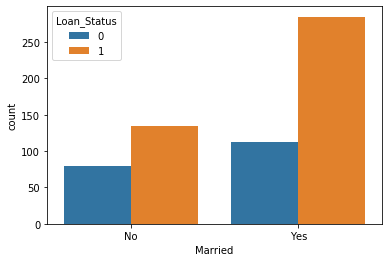

In [12]:
sns.countplot(x="Married",hue="Loan_Status",data=data)
 

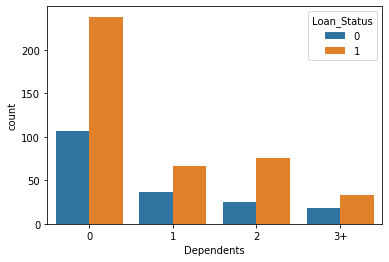

In [13]:
sns.countplot(x='Dependents', hue='Loan_Status', data=data)

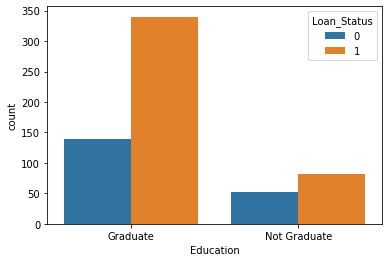

In [14]:
sns.countplot(x="Education",hue="Loan_Status",data=data)


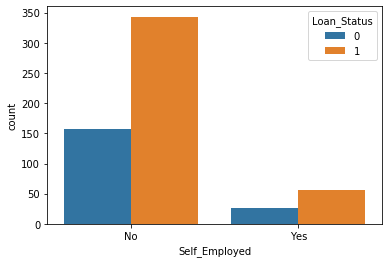

In [15]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=data)


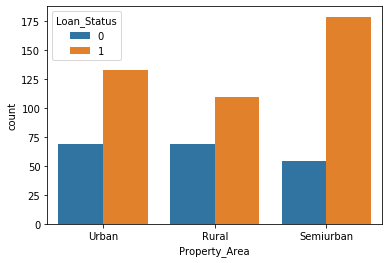

In [16]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=data)


<h3> Box Plot representation to check Outlier Values of Numeric Features</h3>


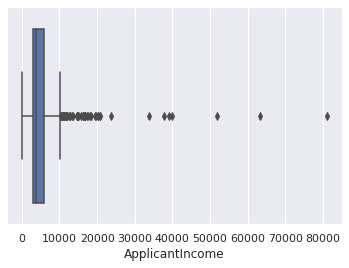

In [17]:
sns.set(style='darkgrid')
sns.boxplot(data.ApplicantIncome)

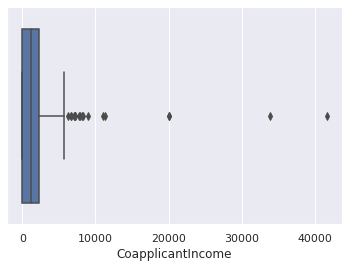

In [18]:
sns.set(style='darkgrid')
sns.boxplot(data.CoapplicantIncome)

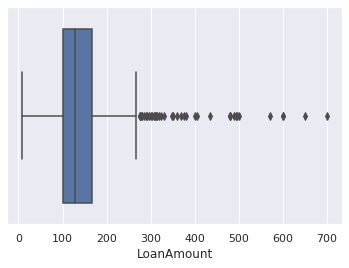

In [19]:
sns.set(style='darkgrid')
sns.boxplot(data.LoanAmount)

<h3> Checking Correlation Between Numerical Features</h3>

In [20]:
cor = data.corr()
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


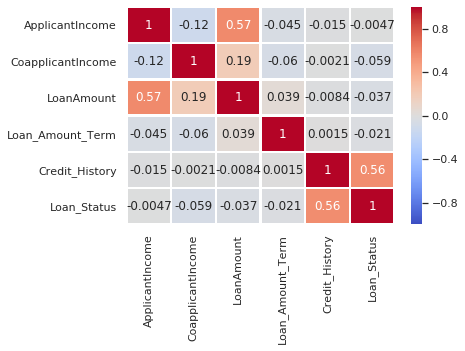

In [21]:

sns.heatmap(cor,vmax=1,vmin=-1,annot=True,linewidth=1.5,cmap="coolwarm")


<h4> From above representation, it is clear that credit history has more correlation compared to others.</h4>

<h3> Plotting Missing Values Columns</h3>


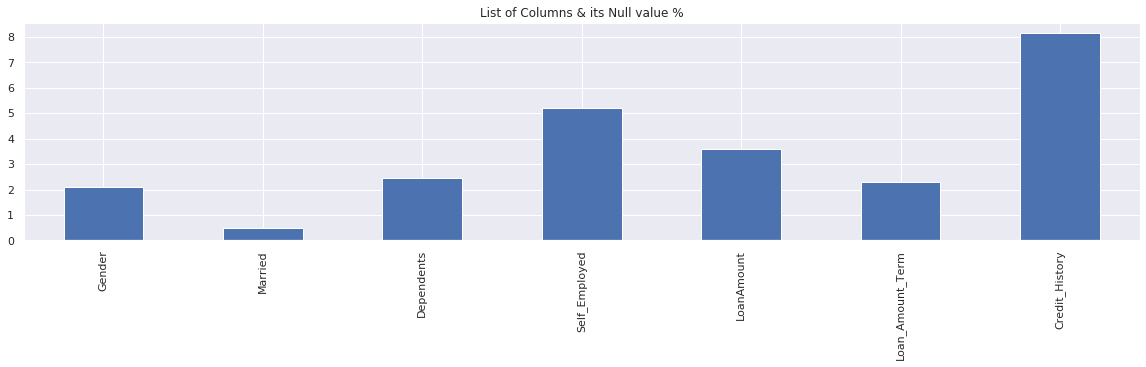

In [22]:
NA_col = data.isna().sum()[data.isna().sum()!=0]*100/data.shape[0]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & its Null value %')
plt.show()

<h3>DATA PREPROCESSING STEPS</h3>

In [23]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
data.isna().sum()[data.isna().sum()!=0]*100/data.shape[0]

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64

In [25]:
data.dtypes[data.isna().sum()!=0]

Gender               object
Married              object
Dependents           object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
dtype: object

In [26]:
data1 = data.copy()

In [27]:
data = data.drop("Loan_ID",axis=1)

In [28]:
data.shape

(614, 12)

<h3> CONVERTING ALL FEATURES TO NUMERICAL FEATURES USING get_dummies()</h3>


In [29]:
datanew = pd.get_dummies(data)
datanew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [30]:
datanew.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [31]:
colnames = datanew.columns
colnames


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

<h3> AFTER CONVERTING TO NUMERICAL FEATURES KNNIMPUTER ALGORITHM IS USED TO HANDLE MISSING VALUES</h3>


In [32]:
from sklearn.impute import KNNImputer

In [33]:
imputer = KNNImputer(n_neighbors = 5)
data_filled = imputer.fit_transform(datanew)
type(data_filled)

numpy.ndarray

In [34]:
df = pd.DataFrame(data=data_filled, columns=colnames)

In [35]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,147.8,360.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000.0,0.0,66.0,360.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,6000.0,0.0,141.0,360.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
df.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

<h3>  PREPARING THE DATA </h3>

<h4>  Dividing the data into attributes (inputs) and labels (outputs) </H4>

In [37]:
X = df.drop("Loan_Status",axis=1)
y= df["Loan_Status"]

<h3>SPLITTING THE DATA INTO TRAINING AND TEST SETS</h3>

<h4>Now we have our attributes and labels, hence, next step is to split the data into training and test sets.
    We will do this by using Scikit-Learn's built-in  StratifiedShuffleSplit  method</h4>

Stratified ShuffleSplit cross-validator

Provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.


In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train,test in sss.split(X,y):
    X_train , X_test = X.iloc[train], X.iloc[test]
    y_train , y_test = y.iloc[train], y.iloc[test]

<h2><b>Training the Algorithm</b></h2>

<h4>We have split our data into training and testing sets, and next step is to train our algorithm.</h4>


<h4>Using Logistic Regression for modelling</h4>

In [41]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train,y_train)

/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h2><b>Making Predictions </b></h2>


<h4>Since we have trained our algorithm, now we have to do some predictions.</h4>

In [42]:
ypred = classifier.predict(X_test)
ypred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0.])

In [43]:
y_test  # Actual value

150    0.0
559    1.0
598    1.0
235    1.0
145    1.0
      ... 
363    1.0
280    0.0
7      0.0
289    1.0
373    0.0
Name: Loan_Status, Length: 123, dtype: float64

<h2><b> Comparing Actual Vs Predicted </b></h2>

In [55]:
Results = pd.DataFrame(columns=[ "Actual", "Predicted"])


Results["Actual"] = y_test
Results["Predicted"] = ypred


Results=Results.reset_index()
Results

,index,Actual,Predicted
0,150,0.0,0.0
1,559,1.0,1.0
2,598,1.0,1.0
3,235,1.0,1.0
4,145,1.0,1.0
...,...,...,...
118,363,1.0,1.0
119,280,0.0,0.0
120,7,0.0,0.0
121,289,1.0,1.0


<h2><b>Evaluating The Model</b></h2>

<h4>CALCULATE CONFUSION MATRIX - No. of correct and wrong prediction<p>

is to evaluate the accuracy of a classification</h3>


In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,ypred)


array([[22, 16],
       [ 1, 84]])

<h4>  CALCULATE ACCURACY SCORE</h3>

In [2]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,ypred)

NameError: name 'y_test' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

<h4>Thank you 